In [1]:
import base64
import pandas as pd
from IPython.display import HTML, display
from sentence_transformers import SentenceTransformer

In [2]:
df = pd.read_parquet(r'../data/memes.parquet', columns=['name', 'local_path'])
df['local_path'] = df['local_path'].apply(lambda x: x['bytes'])
df['name'] = df['name'].apply(lambda x: x.lower().replace(' Meme', ''))
df.drop_duplicates(subset=['name'], keep='first', inplace=True)

df

,name,local_path
0,drake hotline bling meme,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,two buttons meme,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,distracted boyfriend meme,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,bernie i am once again asking for your support...,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,left exit 12 off ramp meme,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
...,...,...
2315,insanity puppy meme,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2316,scumbag redditor meme,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2317,friend zone fiona meme,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2318,crazy girlfriend praying mantis meme,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [3]:
def bytes_to_html_image(byte_data, width=100):
    img_str = base64.b64encode(byte_data).decode('utf-8')
    return f'<img src="data:image/jpeg;base64,{img_str}" width="{width}">'

def display_df_with_images(df, n_rows=10, image_width=100):
    display_df = df[:n_rows].copy()
    display_df['image_preview'] = display_df['local_path'].apply(lambda x: bytes_to_html_image(x, width=image_width))
    display(HTML(display_df.drop('local_path', axis=1).to_html(escape=False, index=False)))

name,image_preview
drake hotline bling meme,
two buttons meme,
distracted boyfriend meme,

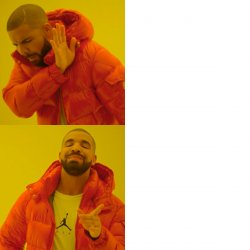
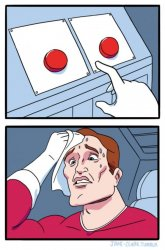
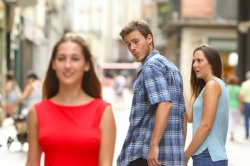

In [4]:
display_df_with_images(df, n_rows=3, image_width=150)

In [5]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2', cache_folder=r'..\models', device='cuda')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

e:\Python\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in E:\Python\NIR_meme_templates\models\models--sentence-transformers--paraphrase-multilingual-MiniLM-L12-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
texts = df['name'].tolist()
embeddings = model.encode(texts)

In [7]:
df['embedding'] = embeddings.tolist()

name,embedding,image_preview
drake hotline bling meme,"[-0.2681884169578552, -0.11066471040248871, 0.1449362188577652, -0.08741513639688492, -0.03761759027838707, -0.30093151330947876, 0.3777883052825928, -0.1308281272649765, -0.23862069845199585, 0.29509490728378296, -0.18480803072452545, -0.20359867811203003, 0.3058617413043976, -0.0883149653673172, 0.21869932115077972, 0.05672465264797211, 0.17722000181674957, -0.008537482470273972, 0.24515360593795776, 0.05764354020357132, 0.20131273567676544, 0.3074249029159546, -0.05442451685667038, -0.07625988870859146, -0.38893961906433105, -0.258829265832901, 0.049296919256448746, -0.17173321545124054, -0.10455328226089478, -0.06784307211637497, 0.22188374400138855, 0.09630313515663147, -0.04683667793869972, 0.08370228856801987, 0.08481995761394501, 0.04593447595834732, 0.15270651876926422, -0.10941947996616364, -0.23190797865390778, -0.11666246503591537, 0.05350584536790848, -0.02995377406477928, -0.2088620811700821, 0.03705549240112305, -0.2433241456747055, 0.07676970958709717, -0.3248528242111206, 0.14521004259586334, -0.17438769340515137, -0.1311541050672531, 0.11803440004587173, -0.009873373433947563, -0.11495966464281082, -0.0033177370205521584, 0.4096781313419342, 0.1200573742389679, -0.02365870214998722, 0.31968143582344055, -0.03276414796710014, 0.31214216351509094, 0.022209402173757553, -0.06305256485939026, -0.01447613351047039, -0.05538605898618698, 0.006202614866197109, 0.03628498315811157, -0.26678118109703064, -0.3108994662761688, 0.14426231384277344, -0.3381730318069458, -0.1974734365940094, -0.2793036103248596, -0.2110254019498825, 0.2218523621559143, 0.08922027051448822, 0.3097486197948456, -0.15483839809894562, -0.22336547076702118, -0.0018234782619401813, 0.016654687002301216, 0.013922016136348248, -0.3840394914150238, 0.21913686394691467, 0.06083836778998375, 0.08235733956098557, -0.1307174116373062, 0.19381897151470184, -0.10651823878288269, -0.030532121658325195, 0.02252650260925293, -0.41494354605674744, -0.10517982393503189, 0.020663360133767128, 0.20452548563480377, 0.053983304649591446, -0.22001177072525024, -0.4467545747756958, -0.17618444561958313, -0.06472855061292648, 0.6437502503395081, ...]",
two buttons meme,"[-0.4919370114803314, 0.07401295751333237, -0.002479964168742299, 0.11083122342824936, 0.046799615025520325, -0.07240051031112671, 0.4766319990158081, -0.22830821573734283, -0.296345591545105, 0.169789656996727, 0.1314764767885208, -0.041557908058166504, 0.26949936151504517, 0.09089229255914688, 0.3121197521686554, 0.046969037503004074, -0.09348404407501221, 0.0825280100107193, 0.24086786806583405, 0.14381970465183258, 0.5257260799407959, -0.21808165311813354, -0.03754192590713501, -0.028078237548470497, -0.7315927147865295, -0.03245887532830238, -0.548530638217926, 0.0114988312125206, 0.320590615272522, -0.1354990154504776, 0.1329750418663025, 0.10306379199028015, -0.32889214158058167, -0.1075473427772522, 0.15267015993595123, -0.06506732106208801, 0.2161061018705368, -0.2659602165222168, -0.18452151119709015, -0.15754006803035736, -0.17352525889873505, -0.19401119649410248, -0.014288493432104588, -0.27167651057243347, 0.037143368273973465, -0.004978161305189133, -0.09879165142774582, 0.49259328842163086, 0.08741020411252975, 0.023628508672118187, 0.2775626480579376, -0.128200963139534, -0.17901325225830078, -0.19562721252441406, 0.6145637631416321, 0.2885947525501251, -0.3734090030193329, 0.5310593843460083, -0.12988628447055817, 0.47781631350517273, 0.13585282862186432, -0.44638022780418396, -0.16221660375595093, 0.34835779666900635, 0.29724612832069397, 0.11310417205095291, -0.5131736397743225, -0.43618664145469666, -0.11987505108118057, -0.04391986131668091, -0.1636604219675064, -0.3788301646709442, 0.17317461967468262, -0.14353047311306, 0.6148009896278381, -0.41475415229797363, -0.4517333507537842, -0.20938129723072052, -0.1065419539809227, 0.4154435694217682, -0.18394315242767334, -0.18687303364276886, 0.2964092195034027, -0.2041256576776
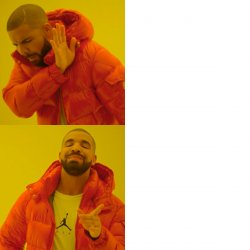
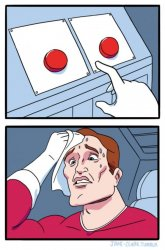
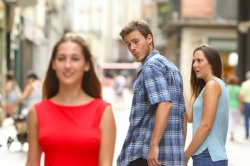

In [8]:
display_df_with_images(df, 3)

In [9]:
df.to_parquet(r'../data/memes_post.parquet')